In [1]:
import os
import json
import h5py
import numpy as np
import shutil 
import h5py
import matplotlib.pyplot as plt 
from tqdm import tqdm 

In [2]:
# dataset_path = "/home/ns1254/data_franka/gib/drawer_lay5_g53b29.hdf5"
dataset_path = "/home/ns1254/data_franka/drawer/mixed_o40z5tal3l5taz5.hdf5"
dataset_path_delta=dataset_path.replace(".hdf5", "")+"_delta2.hdf5"
dataset_path_delta

'/home/ns1254/data_franka/drawer/mixed_o40z5tal3l5taz5_delta2.hdf5'

In [ ]:
# print('Copying hdf5')
# shutil.copy(str(dataset_path), str(dataset_path_delta))

In [4]:
f = h5py.File(dataset_path_delta, "r")
demos = list(f["data"].keys())
len(demos)

58

In [5]:
demo_name = "demo_0"
demo = f["data"][demo_name]
actions = demo['actions'][:]
actions.shape

(283, 7)

In [6]:
# f['mask'].keys()

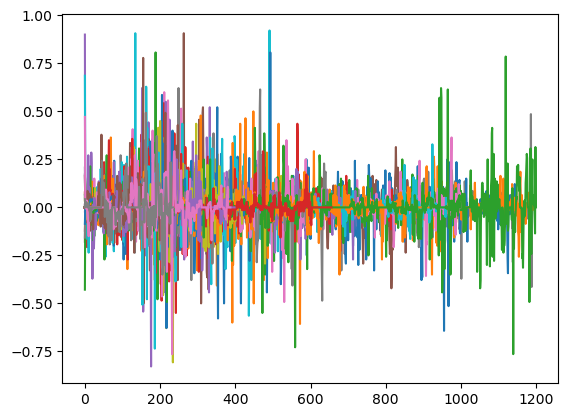

In [6]:
demo_name = "demo_0"

scale = 1.0 #2.5
for demo_name in demos:
    demo = f["data"][demo_name]
    actions = demo['actions'][:]*scale
    plt.plot(actions[:,0], label='x')
    # plt.plot(actions[:,1], label='y')
    # plt.plot(actions[:,2], label='z')
    # plt.plot(actions[:,-1], label='g')
    # plt.legend()

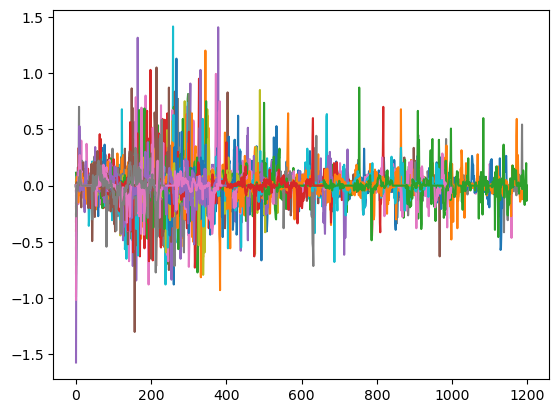

In [7]:
demo_name = "demo_0"

for demo_name in demos:
    demo = f["data"][demo_name]
    actions = demo['actions'][:]*scale
    # plt.plot(actions[:,0], label='x')
    plt.plot(actions[:,1], label='y')
    # plt.plot(actions[:,2], label='z')
    # plt.plot(actions[:,-1], label='g')
    # plt.legend()

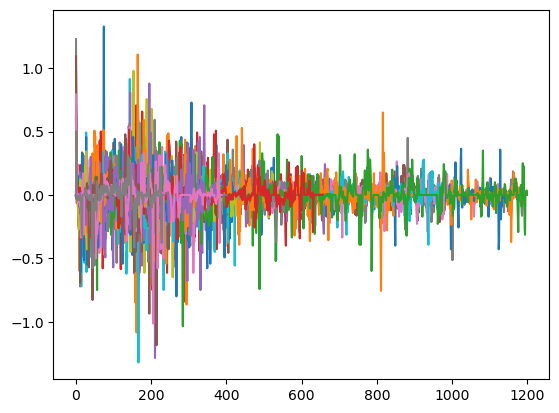

In [8]:
demo_name = "demo_0"

for demo_name in demos:
    demo = f["data"][demo_name]
    actions = demo['actions'][:]*scale
    # plt.plot(actions[:,0], label='x')
    # plt.plot(actions[:,1], label='y')
    plt.plot(actions[:,2], label='z')
    # plt.plot(actions[:,-1], label='g')
    # plt.legend()

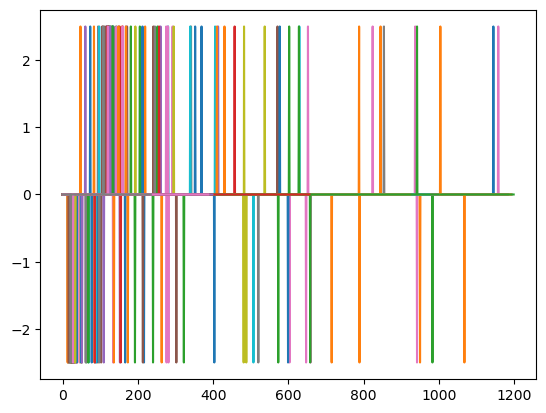

In [9]:
demo_name = "demo_0"

for demo_name in demos:
    demo = f["data"][demo_name]
    actions = demo['actions'][:]
    # plt.plot(actions[:,0], label='x')
    # plt.plot(actions[:,1], label='y')
    # plt.plot(actions[:,2], label='z')
    plt.plot(actions[:,-1], label='g')
    # plt.legend()

In [11]:
def get_delta_action(abs_actions, scale=1.0):
    actions = abs_actions
    delta_actions = np.zeros_like(actions)
    for i in range(len(actions)-1):
        current_action = actions[i]
        next_action = actions[i+1]

        delta_action = current_action - next_action
        delta_actions[i] = np.clip(delta_action, -1, 1)
    return delta_actions*scale

In [12]:
demo_name = "demo_0"
demo = f["data"][demo_name]
actions = demo['actions'][:]
delta_actions = get_delta_action(actions, scale=2.5)

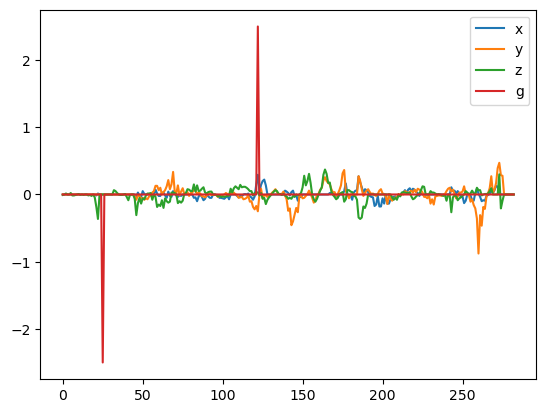

In [13]:
plt.plot(delta_actions[:,0], label='x')
plt.plot(delta_actions[:,1], label='y')
plt.plot(delta_actions[:,2], label='z')
plt.plot(delta_actions[:,-1], label='g')
plt.legend()

In [14]:
demo_name = "demo_0"

for demo_name in tqdm( f['data'].keys() ):
    demo = f["data"][demo_name]
    actions = demo['actions'][:]
    delta_actions = get_delta_action(actions, scale=2.5)
    demo['actions'][:] = delta_actions

100%|██████████| 58/58 [00:00<00:00, 230.51it/s]


In [15]:
f.close()